# Explainable Artificial Intelligence - Random Forest and Feature Seletion and Importance

- RF is a ensemble leargning algorthim ( When you have a plurality of models predicting your output that individually are not good but they are pretty good . Ensemble = an average of models.)
- In simple words, a random forest is a combination of decision trees. A decision tree tries to split data where it would try to see the biggest difference between the "no" and the "yes" (first split or leaf). Then it make a second split an so on.

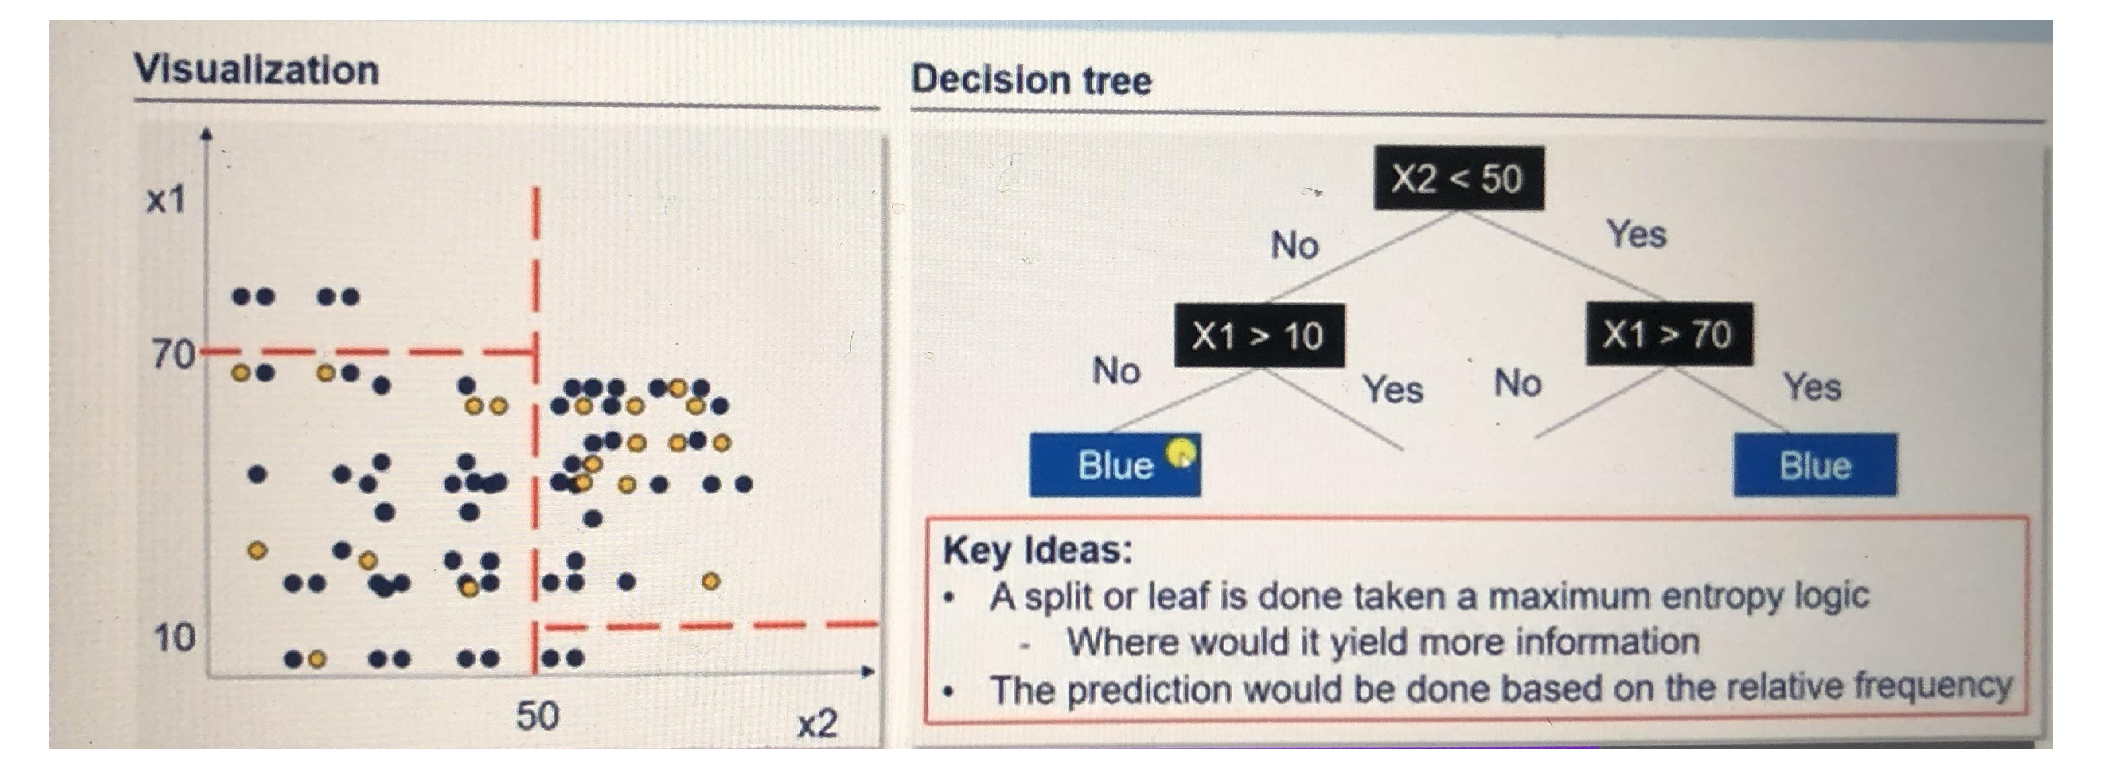

- Can be used for Regression and Classification problems.
- RD have a tendency to overfit

**Case of study:** to figure out which are the main drivers of customers that sign up to a savings account in a bank

1. Prepare Dataset
2. Split into training and test set
3. Perform Random Forest
4. Predict using the Random Forest
5. Model Assessment
6. Execute Driver importance

# Libraries and data

In [1]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\7. Random Forest and Driver Importance

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\7. Random Forest and Driver Importance


In [2]:
#import libraries
import pandas as pd

In [11]:
#import the data
data = pd.read_csv("bank-full.csv", sep = ";")
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

# Data Prep

In [12]:
data.head(1)

age         job  marital education default  balance housing loan  contact  \
0   58  management  married  tertiary      no     2143     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no

In [30]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [13]:
#transform the string variables
dataset = pd.get_dummies(data = data,  #convert to dummies
                         drop_first = True) #evitar trampa dummies
dataset.head()

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0                0   
1   44       29    5       151         1     -1         0                0   
2   33        2    5        76         1     -1         0                0   
3   47     1506    5        92         1     -1         0                1   
4   33        1    5       198         1     -1         0                0   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0                 0              0  ...          0          0          1   
1                 0              0  ...          0          0          1   
2                 1              0  ...          0          0          1   
3                 0              0  ...          0          0          1   
4                 0              0  ...          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          0          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  y_yes  
0                 1      0  
1                 1      0  
2                 1      0  
3                 1      0  
4                 1      0  

[5 rows x 43 columns]

In [14]:
#isolate X and Y
y = dataset.iloc[:,-1] # just keep y
X = dataset.iloc[:, :-1] # jsut keep x
X.head(1)

age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   58     2143    5       261         1     -1         0                0   

   job_entrepreneur  job_housemaid  ...  month_jul  month_jun  month_mar  \
0                 0              0  ...          0          0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0          1          0          0          0               0   

   poutcome_success  poutcome_unknown  
0                 0                 1  

[1 rows x 42 columns]

In [18]:
y.head(2)

0    0
1    0
Name: y_yes, dtype: uint8

In [19]:
#split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502,
                                                    stratify = y) # trining and test set are equivalent as posiible
X_train.head()

age  balance  day  duration  campaign  pdays  previous  \
6276    31       66   27       121         1     -1         0   
2876    48      427   14       201         1     -1         0   
39212   33      139   18       732         2    291         5   
40781   23        0   10       213         1     -1         0   
7551    37     1255   30       224         2     -1         0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
6276                 1                 0              0  ...          0   
2876                 0                 0              0  ...          0   
39212                1                 0              0  ...          0   
40781                0                 0              0  ...          0   
7551                 0                 0              0  ...          0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
6276           0          0          1          0          0          0   
2876           0          0          1          0          0          0   
39212          0          0          1          0          0          0   
40781          0          0          0          0          0          0   
7551           0          0          1          0          0          0   

       poutcome_other  poutcome_success  poutcome_unknown  
6276                0                 0                 1  
2876                0                 0                 1  
39212               0                 0                 0  
40781               0                 0                 1  
7551                0                 0                 1  

[5 rows x 42 columns]

# Random forest

In [23]:
#RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 300,
                               random_state = 1502)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1502)

In [24]:
#Predictions with X_test set
predictions = model.predict(X_test)
predictions[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=uint8)

In [25]:
#checkin dataset balance
y_test.mean() # 12% poeple said yes

0.11699657193409267

In [26]:
y_train.mean() # 12% poeple said yes and 82% said no: no balance set

0.11698186241981863

# Confusion Matrix, ROC and indicators

balance sample: ROC ok. unbalance sample: F1 (no ROC)

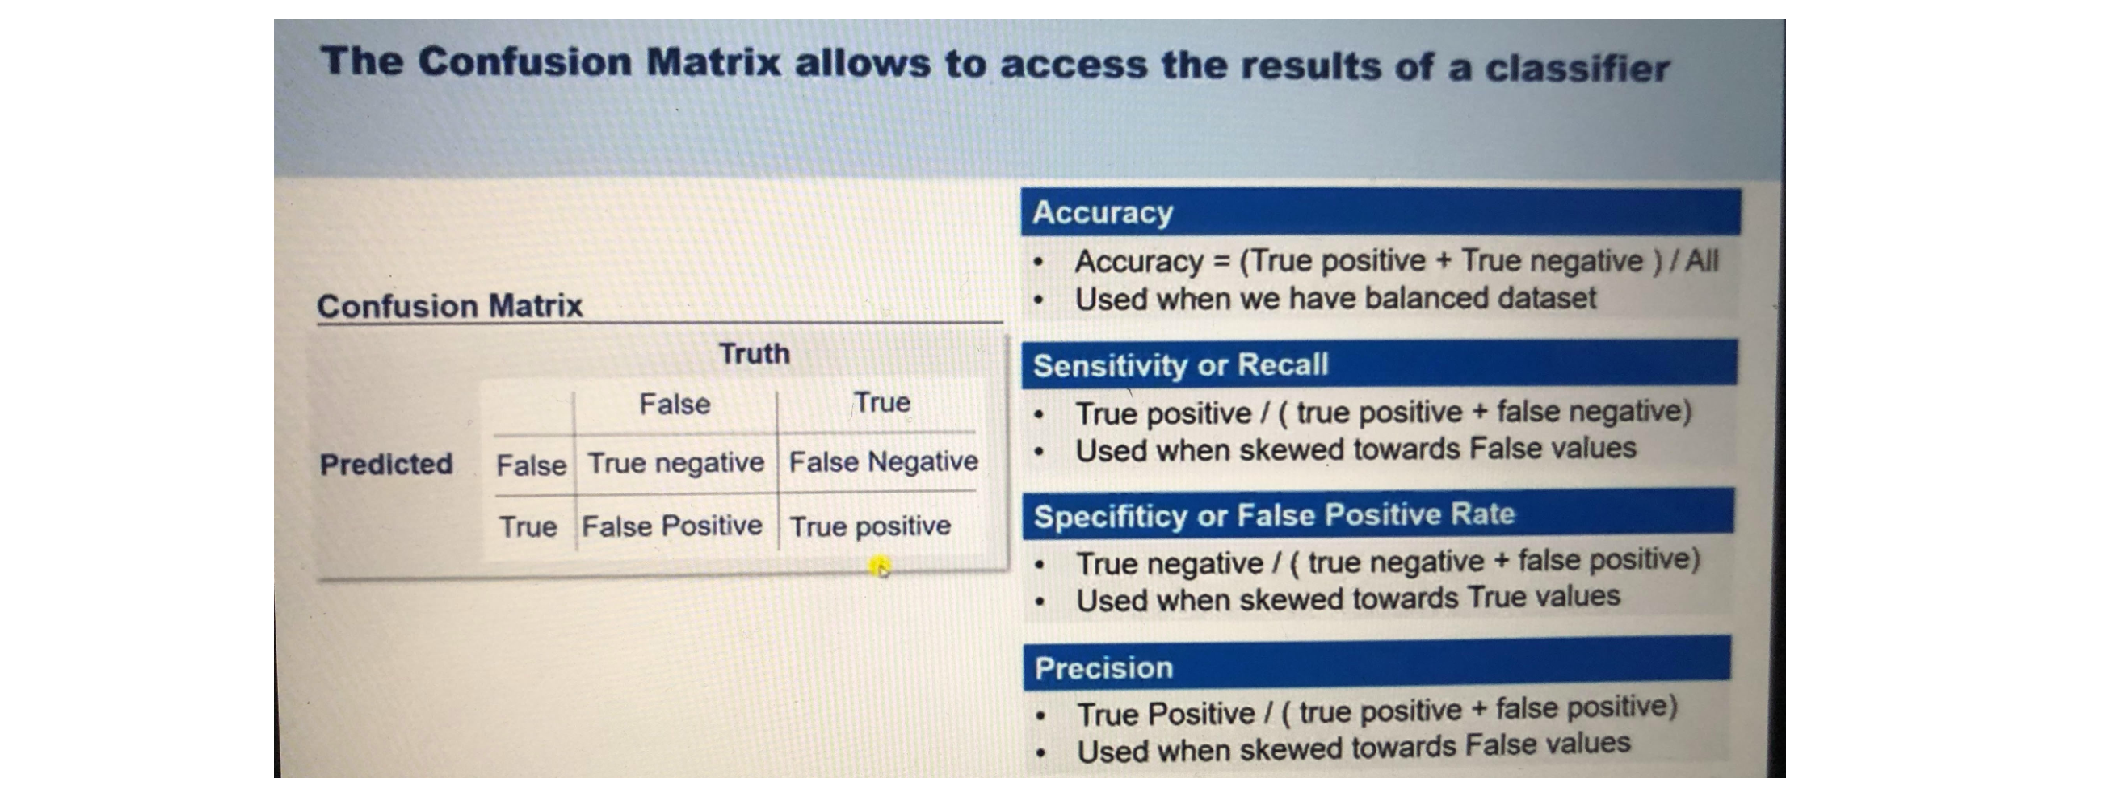
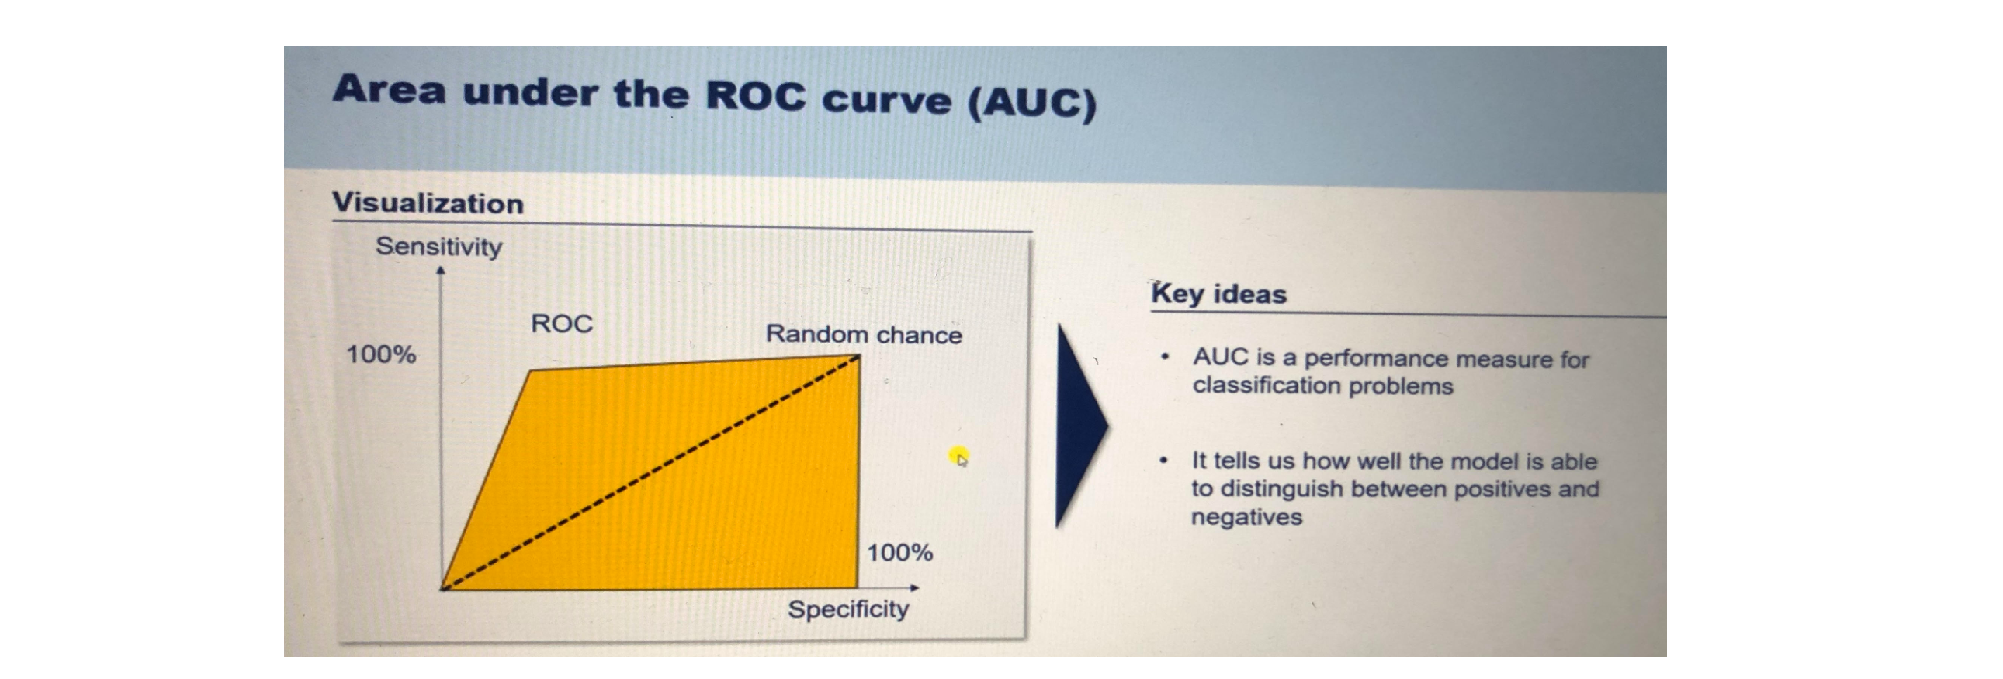
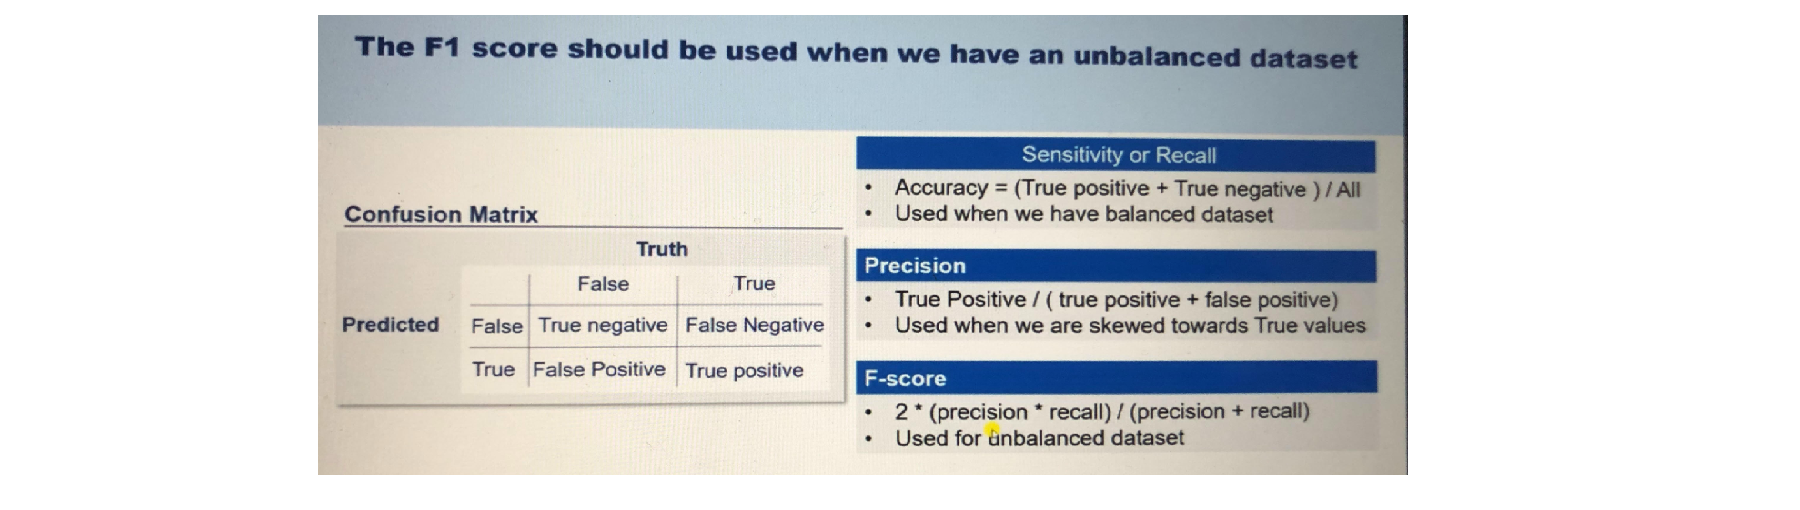

In [27]:
#Confusion Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
# we care about f1 and recall(sensitivity).
# recall 0,4: the model is good to identify true values 4 out of 10 times

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.90      9043



# Feature Importance

<AxesSubplot:>

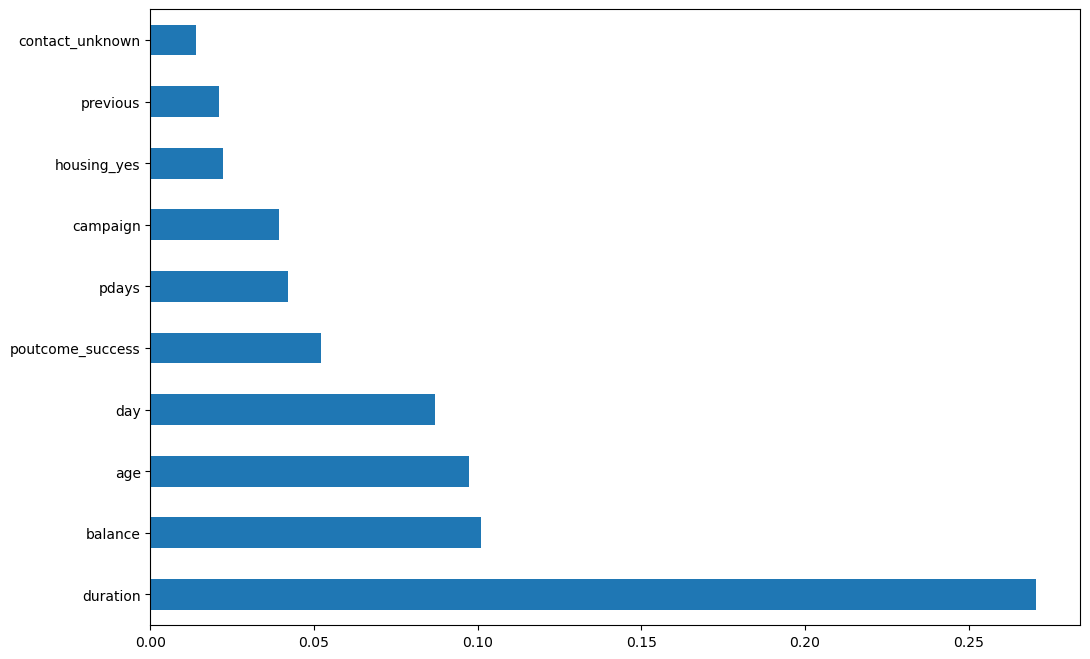

In [28]:
#Feature Importance
importance = pd.Series(model.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(10).plot(kind = 'barh',
                            figsize = (12, 8))